# Composting

In [1]:
# Import libraries
from swolfpy_processmodels import Comp
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "12"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)

In [2]:
model = Comp()
model.calc()
report=model.report()

In [3]:
model.substrate_to_ac.data['mass'][model.substrate_to_ac.data['mass']>1000]

Yard_Trimmings_Leaves            1179.877609
Yard_Trimmings_Grass             1058.607121
Yard_Trimmings_Branches          1124.715650
Food_Waste_Vegetable             1042.424566
Food_Waste_Non_Vegetable         1057.620380
Wood                             1110.649554
Wood_Other                       1087.519476
Misc_Organic                     1023.958776
Diapers_and_sanitary_products    1107.597825
Name: mass, dtype: float64

## Mass balance
* Note: Part of organic wastes are degeraded during the aerobic composting process and emitted to air. So the ratio of products to input waste is smaller than 1.

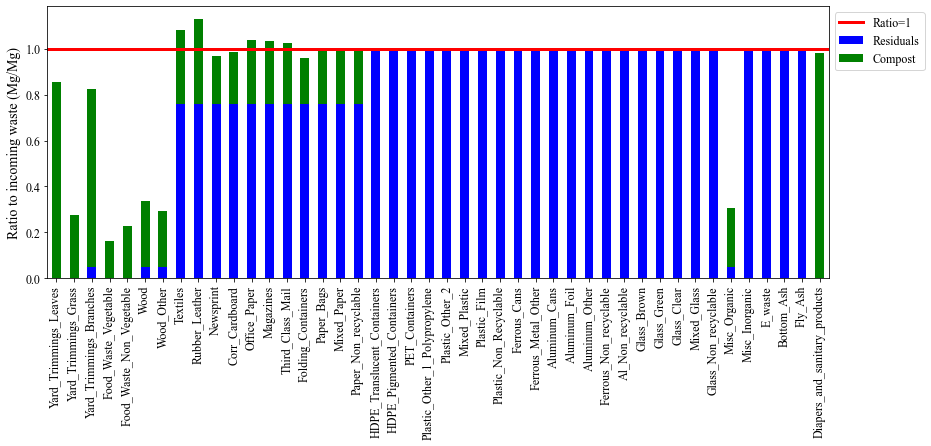

In [4]:
OtherResidual = model.S2_residuls.data['mass'].values/1000
Compost = model.final_comp.data['mass'].values/1000

WasteProductsDf = pd.DataFrame({'Residuals': OtherResidual, 'Compost': Compost}) 

fig, ax=plt.subplots(figsize=(14, 5))
WasteProductsDf.plot(kind='bar', stacked=True, ax=ax, color=['b','g'])

ax.set_ylabel('Ratio to incoming waste (Mg/Mg)', fontdict={'size':14})
ticks = ax.set_xticklabels(model.Index, rotation=90)
ax.axhline(1, c='r',ls='-', lw=3, label='Ratio=1')
ax.legend(bbox_to_anchor=(1, 1))

## Moisture Content changes during the composting

In [5]:
def moisture_content(Composting, composition):
    df = pd.DataFrame(columns=['Moisture Content'])
    flows_dit = {'Incoming Waste': Composting.input_flow,
                 'Substrate to active composting (+ Water)': Composting.substrate_to_ac,
                 'Substrate to post screen': Composting.substrate_to_ps,
                 'Substrate to post vaccume': Composting.substrate_to_vac,
                 'Substrate to curing': Composting.substrate_to_cu,
                 'Final compost': Composting.final_comp}    
    for name, flow in flows_dit.items(): 
        flow.update(composition)
        df.loc[name, 'Moisture Content'] = np.round(flow.moist_cont * 100, 2)
    
    return df

In [6]:
moisture_content(model, model.Assumed_Comp)

,Moisture Content
Incoming Waste,46.42
Substrate to active composting (+ Water),55.0
Substrate to post screen,50.0
Substrate to post vaccume,50.0
Substrate to curing,50.0
Final compost,45.0
